# Statistical Profiling

This notebook serves as a visualization tool for statistical profiling of the Bills data, mainly the quantification of imbalance/ statistical bias. 

These functions are to be run on data gathered using the 01_get_compiled_subjects_dataframe.py from the 02_gathering directory. It is expected that the data is to be in the form of a Pandas Dataframe with the following attributes:
- congress
- billNumber
- billType
- legislativeSubjects
- policyArea

The insights from this notebook serve as part of the justification for the mitigation techniques which are to be applied to the data in the next section of the experiment (see 04_mitigating_imbalance).

#### Techniques used:
- Cardinality Analysis: number of unique values for each categorical attribute
- Class Ratios: measures the relative proportion of different categories to detect potential skewness
- Normalized Cross-tabulation: standardized view of relationships between categorical attributes for better interpretability
- Gini Index: quantifies the imbalance between class distributions, higher values indicate greater imbalance
- Entropy Calculation: measure the uncertainty in class distributions, helping to assess diversity
- Chi-Squared Test for Independence: evaluates statistical independence between categorical attributes to identify potential significant relationships
- Cramer's V: normalized measure of association derived from the Chi-squared test, indicating the strength of relationships between attributes

In [1]:
import pandas as pd 
from utils.statistical import (
    calculate_cardinality,
    calculate_class_ratio,
    analyze_bias_crosstab,
    plot_gini_indexes,
    plot_entropies,
    chi_squared_test,
    calculate_cramers_v,
    plot_cramers_v_heatmap
)

%matplotlib inline

In [2]:
# data = pd.read_csv("../../local_data/bills/generated_data/compiled_subjects.csv.gz", 
#                  compression="gzip",
#                  converters={"legislativeSubjects": pd.eval})

In [3]:
data = pd.read_csv("../../local_data/01_bills/generated_data/concat_compiled_subjects_with_text.csv.gz", 
                 compression="gzip",
                 converters={
                     "congress": str,
                     "legislativeSubjects": pd.eval
                     })

In [4]:
data.head()

,congress,billType,billNumber,legislativeSubjects,policyArea,billText
0,101,hconres,1,"[American economic assistance, American milita...",International Affairs,<pre>Â \nB37 6-6-89 [OC's]\nHCON 1 IH\n101st C...
1,101,hconres,10,"[Constitutional law, Meditation, Prayer in the...","Civil Rights and Liberties, Minority Issues",<pre>Â \nB37 Rosey 1/4/89 [Updated]\nHCON 10 I...
2,101,hconres,100,"[Genocide, Human rights, International relief,...",International Affairs,<pre>Â \nHCON 100 IH\n101st CONGRESS\n1st Sess...
3,101,hconres,101,"[AIDS (Disease), Drug abuse, Equipment and sup...",Health,<pre>Â \nHCON 101 IH\n101st CONGRESS\n1st Sess...
4,101,hconres,102,"[Hurricanes, Meteorology, Military aircraft, W...","Science, Technology, Communications",<pre>Â \nB37 4-25-89 [update]\nHCON 102 IH\n10...


In [5]:
calculate_cardinality(data, ["congress", "billType", "billNumber", "legislativeSubjects", "policyArea"])

congress                   18
billType                    8
billNumber              10042
legislativeSubjects      6210
policyArea                 34
billText               220012
dtype: int64

In [6]:
calculate_class_ratio(data, "congress", n=2)

Most dominant values in congress:
congress
118    0.083268
117    0.080800
Name: proportion, dtype: float64

Least dominant values in congress:
congress
105    0.041548
104    0.036316
Name: proportion, dtype: float64


congress
118    0.083268
117    0.080800
116    0.075123
110    0.063792
111    0.062124
115    0.061301
109    0.059392
112    0.055806
114    0.054633
106    0.049256
107    0.049038
108    0.048483
113    0.048324
102    0.045129
101    0.043211
103    0.042457
105    0.041548
104    0.036316
Name: proportion, dtype: float64

In [7]:
calculate_class_ratio(data, "billType", n=1)

Most dominant values in billType:
billType
hr    0.533437
Name: proportion, dtype: float64

Least dominant values in billType:
billType
sjres    0.006368
Name: proportion, dtype: float64


billType
hr         0.533437
s          0.290842
hres       0.077809
sres       0.044997
hconres    0.024017
hjres      0.015285
sconres    0.007245
sjres      0.006368
Name: proportion, dtype: float64

In [8]:
calculate_class_ratio(data, "legislativeSubjects", n=5)

Most dominant values in legislativeSubjects:
legislativeSubjects
Government Operations and Politics    0.016764
Congressional oversight               0.012047
Congress                              0.011932
Economics and Public Finance          0.011831
Commerce                              0.010113
Name: proportion, dtype: float64

Least dominant values in legislativeSubjects:
legislativeSubjects
House Select Committee on Energy Independence and Global Warming    5.433200e-07
Monaco                                                              5.433200e-07
Andorra                                                             5.433200e-07
Airline law and legislation                                         5.433200e-07
Renegotiation                                                       5.433200e-07
Name: proportion, dtype: float64


legislativeSubjects
Government Operations and Politics                                  1.676414e-02
Congressional oversight                                             1.204703e-02
Congress                                                            1.193239e-02
Economics and Public Finance                                        1.183134e-02
Commerce                                                            1.011281e-02
                                                                        ...     
House Select Committee on Energy Independence and Global Warming    5.433200e-07
Monaco                                                              5.433200e-07
Andorra                                                             5.433200e-07
Airline law and legislation                                         5.433200e-07
Renegotiation                                                       5.433200e-07
Name: proportion, Length: 6210, dtype: float64

In [9]:
calculate_class_ratio(data, "policyArea", n=5)

Most dominant values in policyArea:
policyArea
Health                                0.100694
Taxation                              0.083286
Armed Forces and National Security    0.066737
International Affairs                 0.063955
Government Operations and Politics    0.062328
Name: proportion, dtype: float64

Least dominant values in policyArea:
policyArea
Families                       0.007195
Sports and Recreation          0.005109
Animals                        0.004741
Arts, Culture, Religion        0.004563
Social Sciences and History    0.000859
Name: proportion, dtype: float64


policyArea
Health                                         0.100694
Taxation                                       0.083286
Armed Forces and National Security             0.066737
International Affairs                          0.063955
Government Operations and Politics             0.062328
Foreign Trade and International Finance        0.054874
Congress                                       0.049102
Public Lands and Natural Resources             0.048906
Crime and Law Enforcement                      0.047220
Education                                      0.038989
Transportation and Public Works                0.033771
Finance and Financial Sector                   0.028748
Commemorations                                 0.028357
Environmental Protection                       0.025403
Labor and Employment                           0.023912
Commerce                                       0.023712
Energy                                         0.023117
Agriculture and Food                 

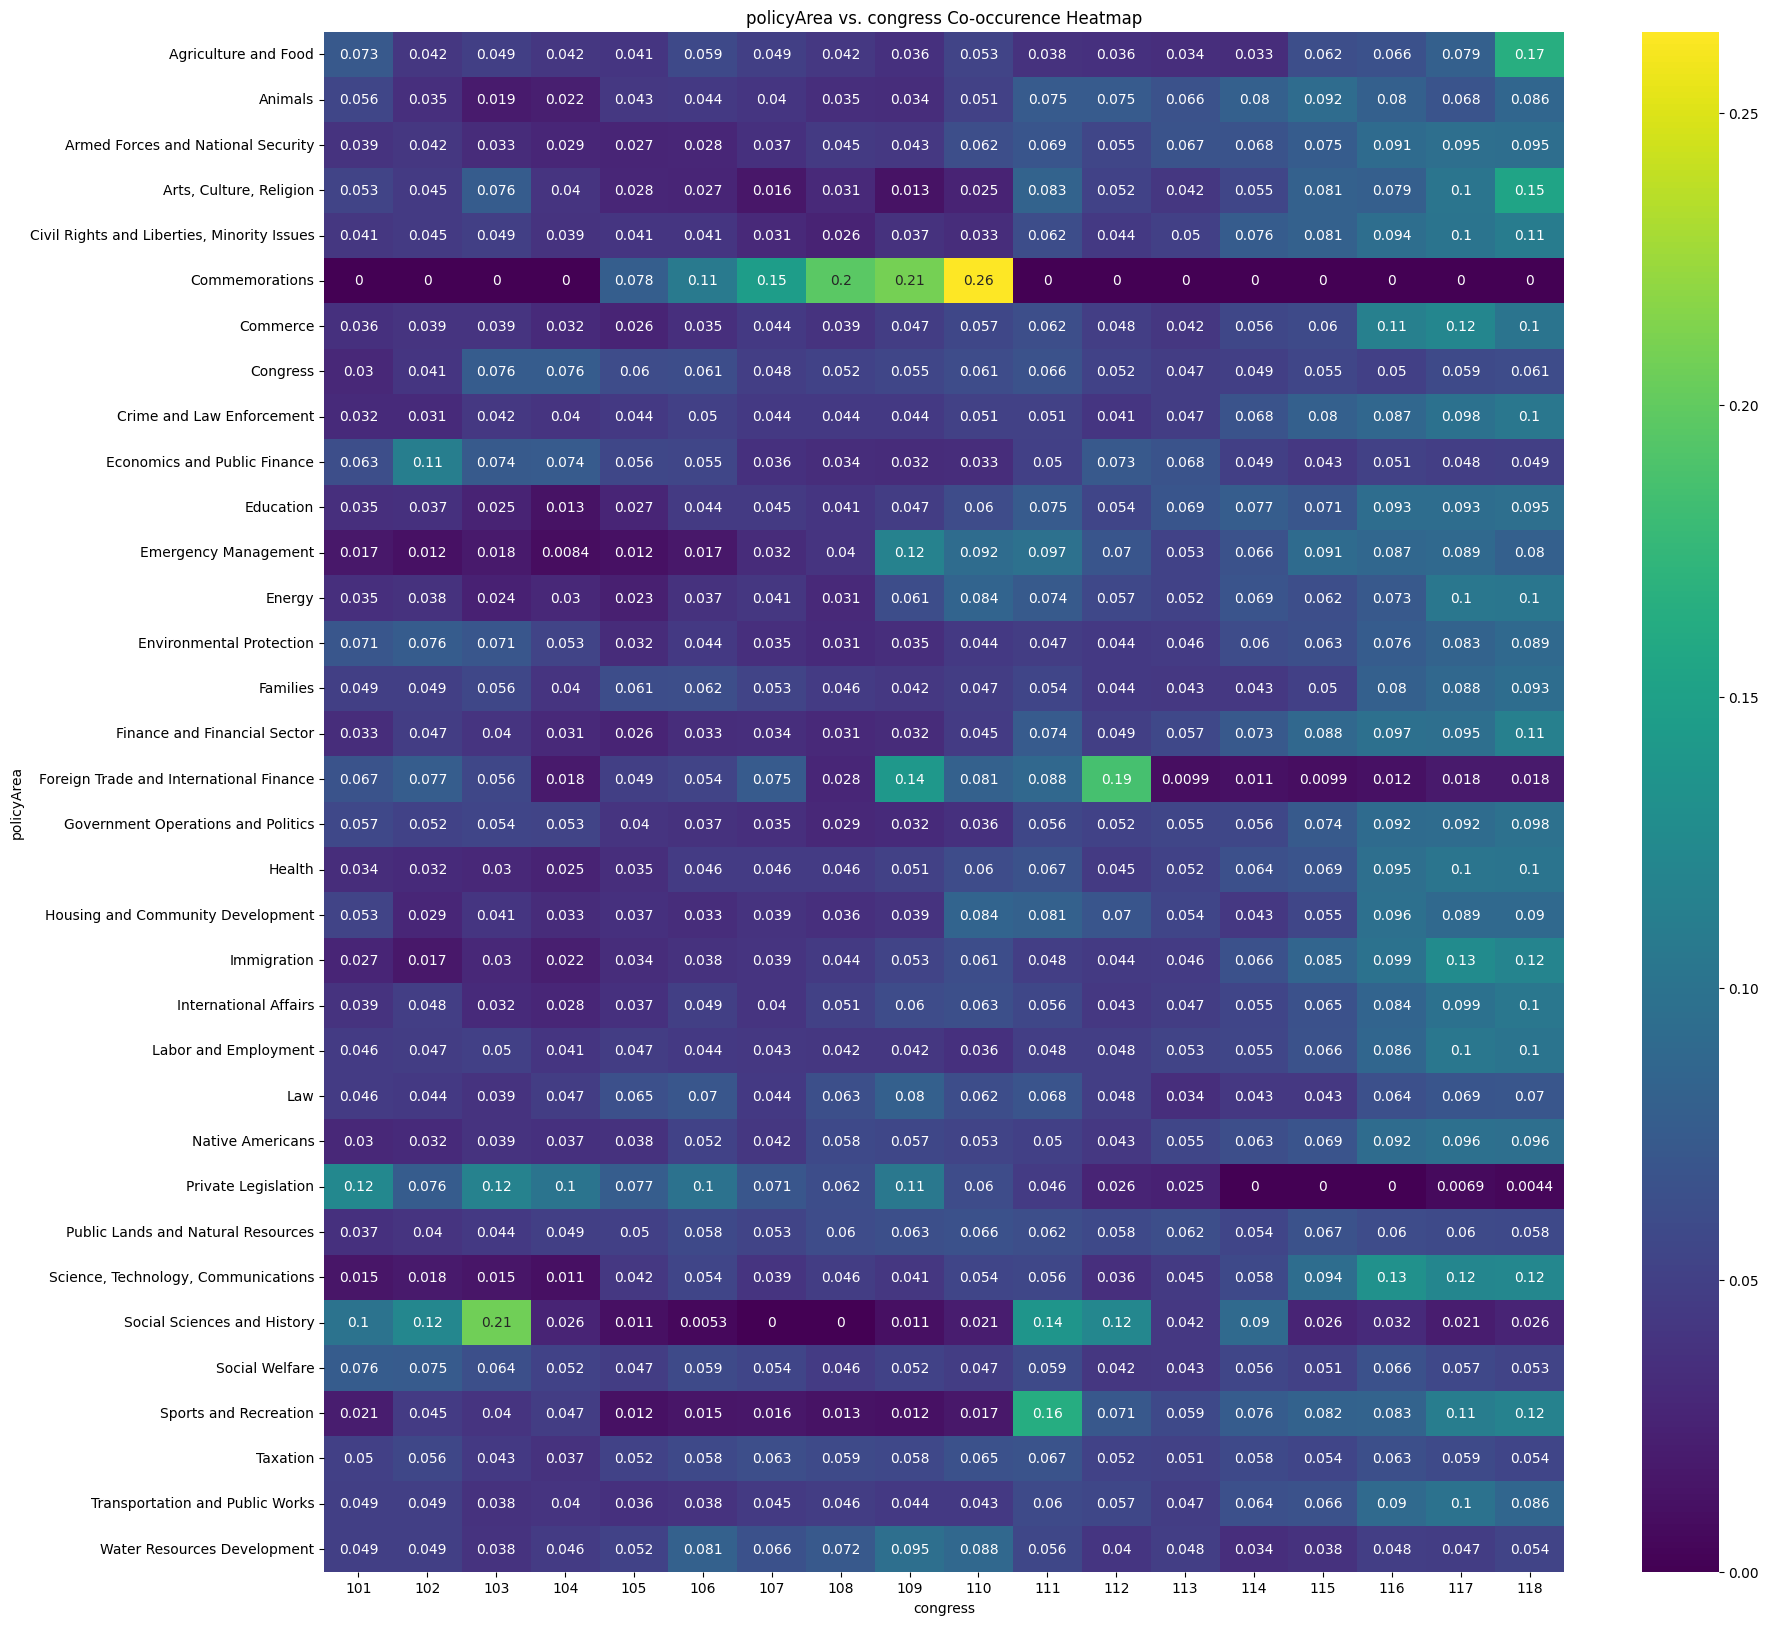

In [10]:
analyze_bias_crosstab(data, ["policyArea", "congress"], figsize=(20,20))

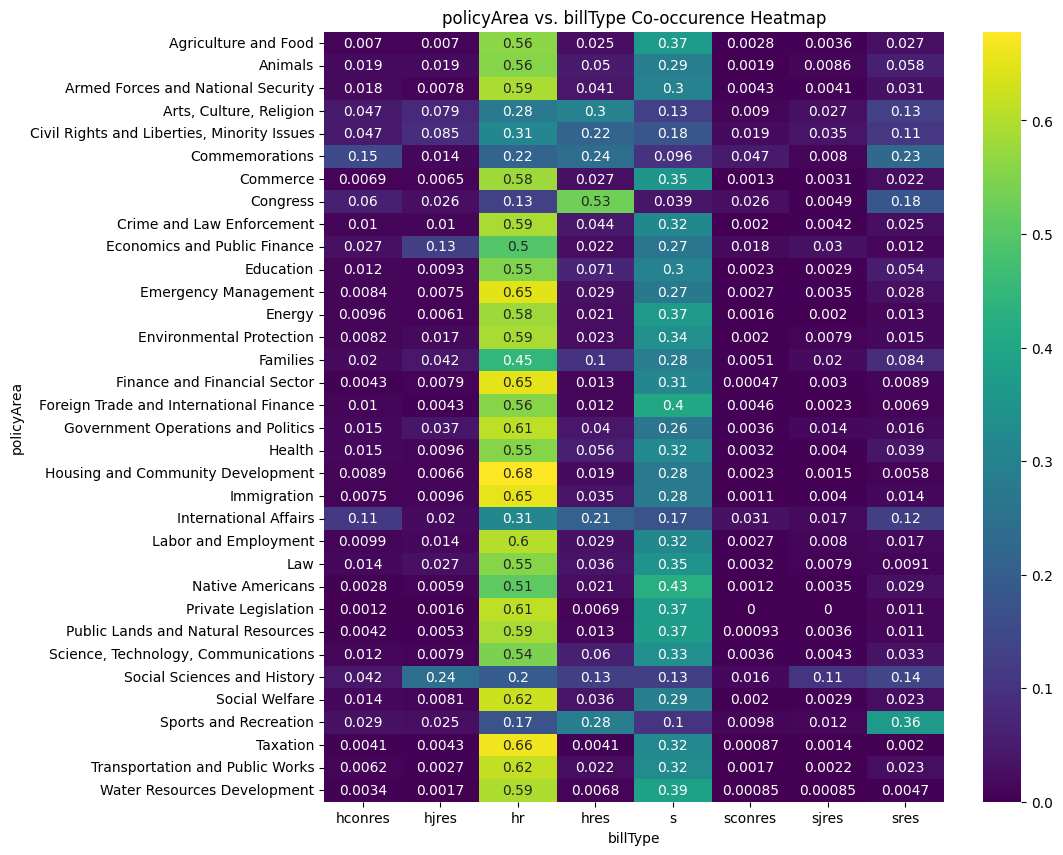

In [11]:
analyze_bias_crosstab(data, ["policyArea", "billType"])

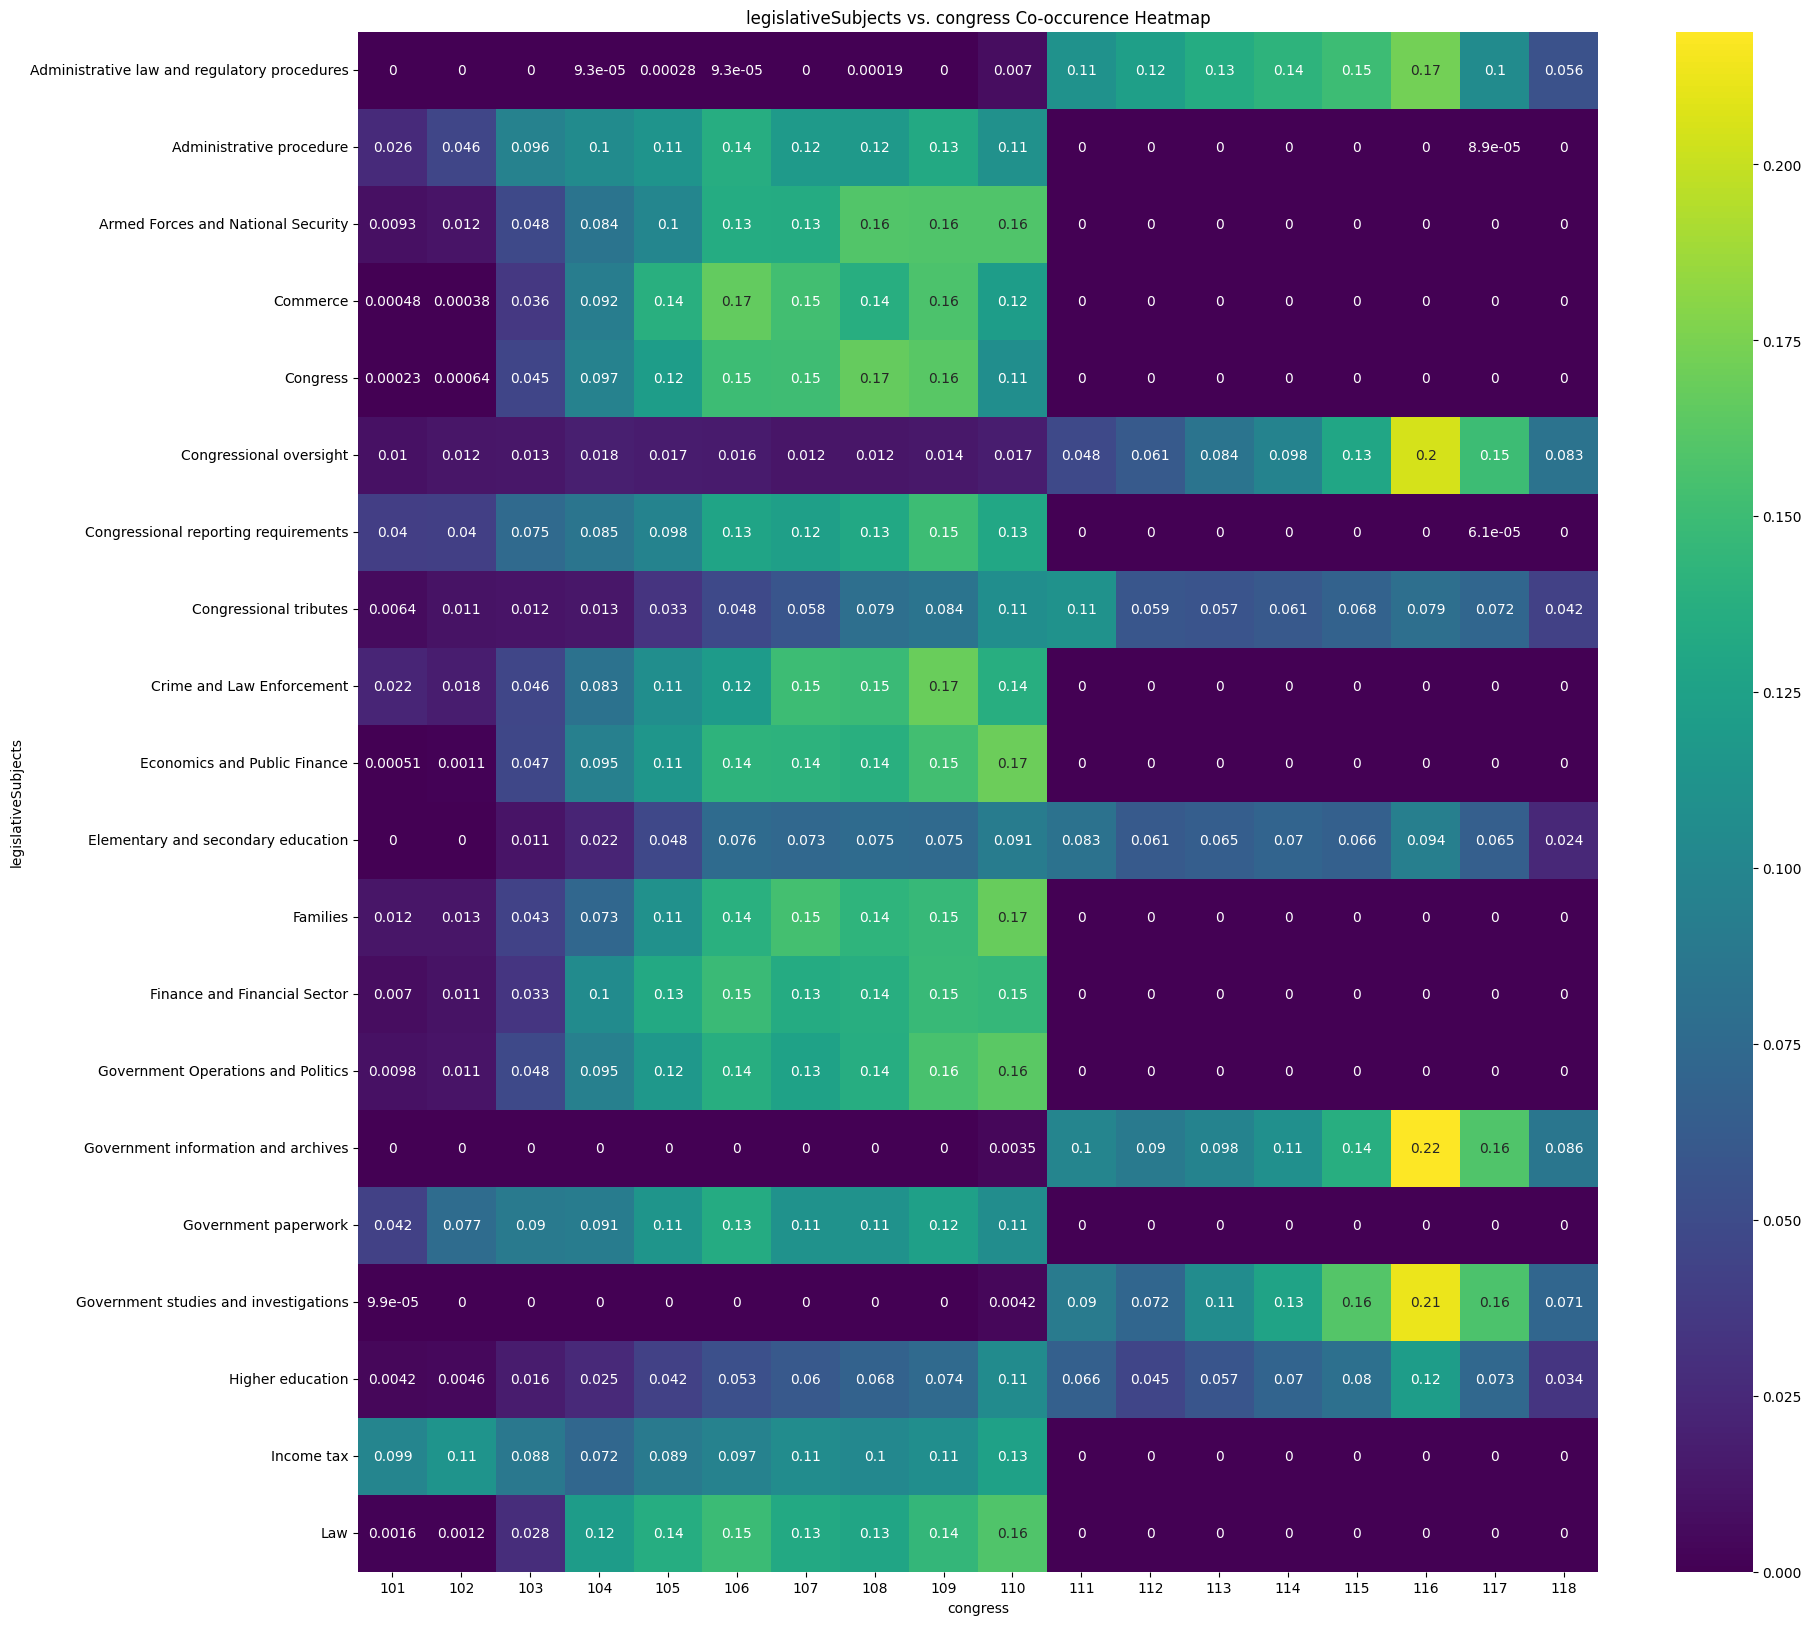

In [12]:
analyze_bias_crosstab(data, ["legislativeSubjects", "congress"], n=20, figsize=(20,20))

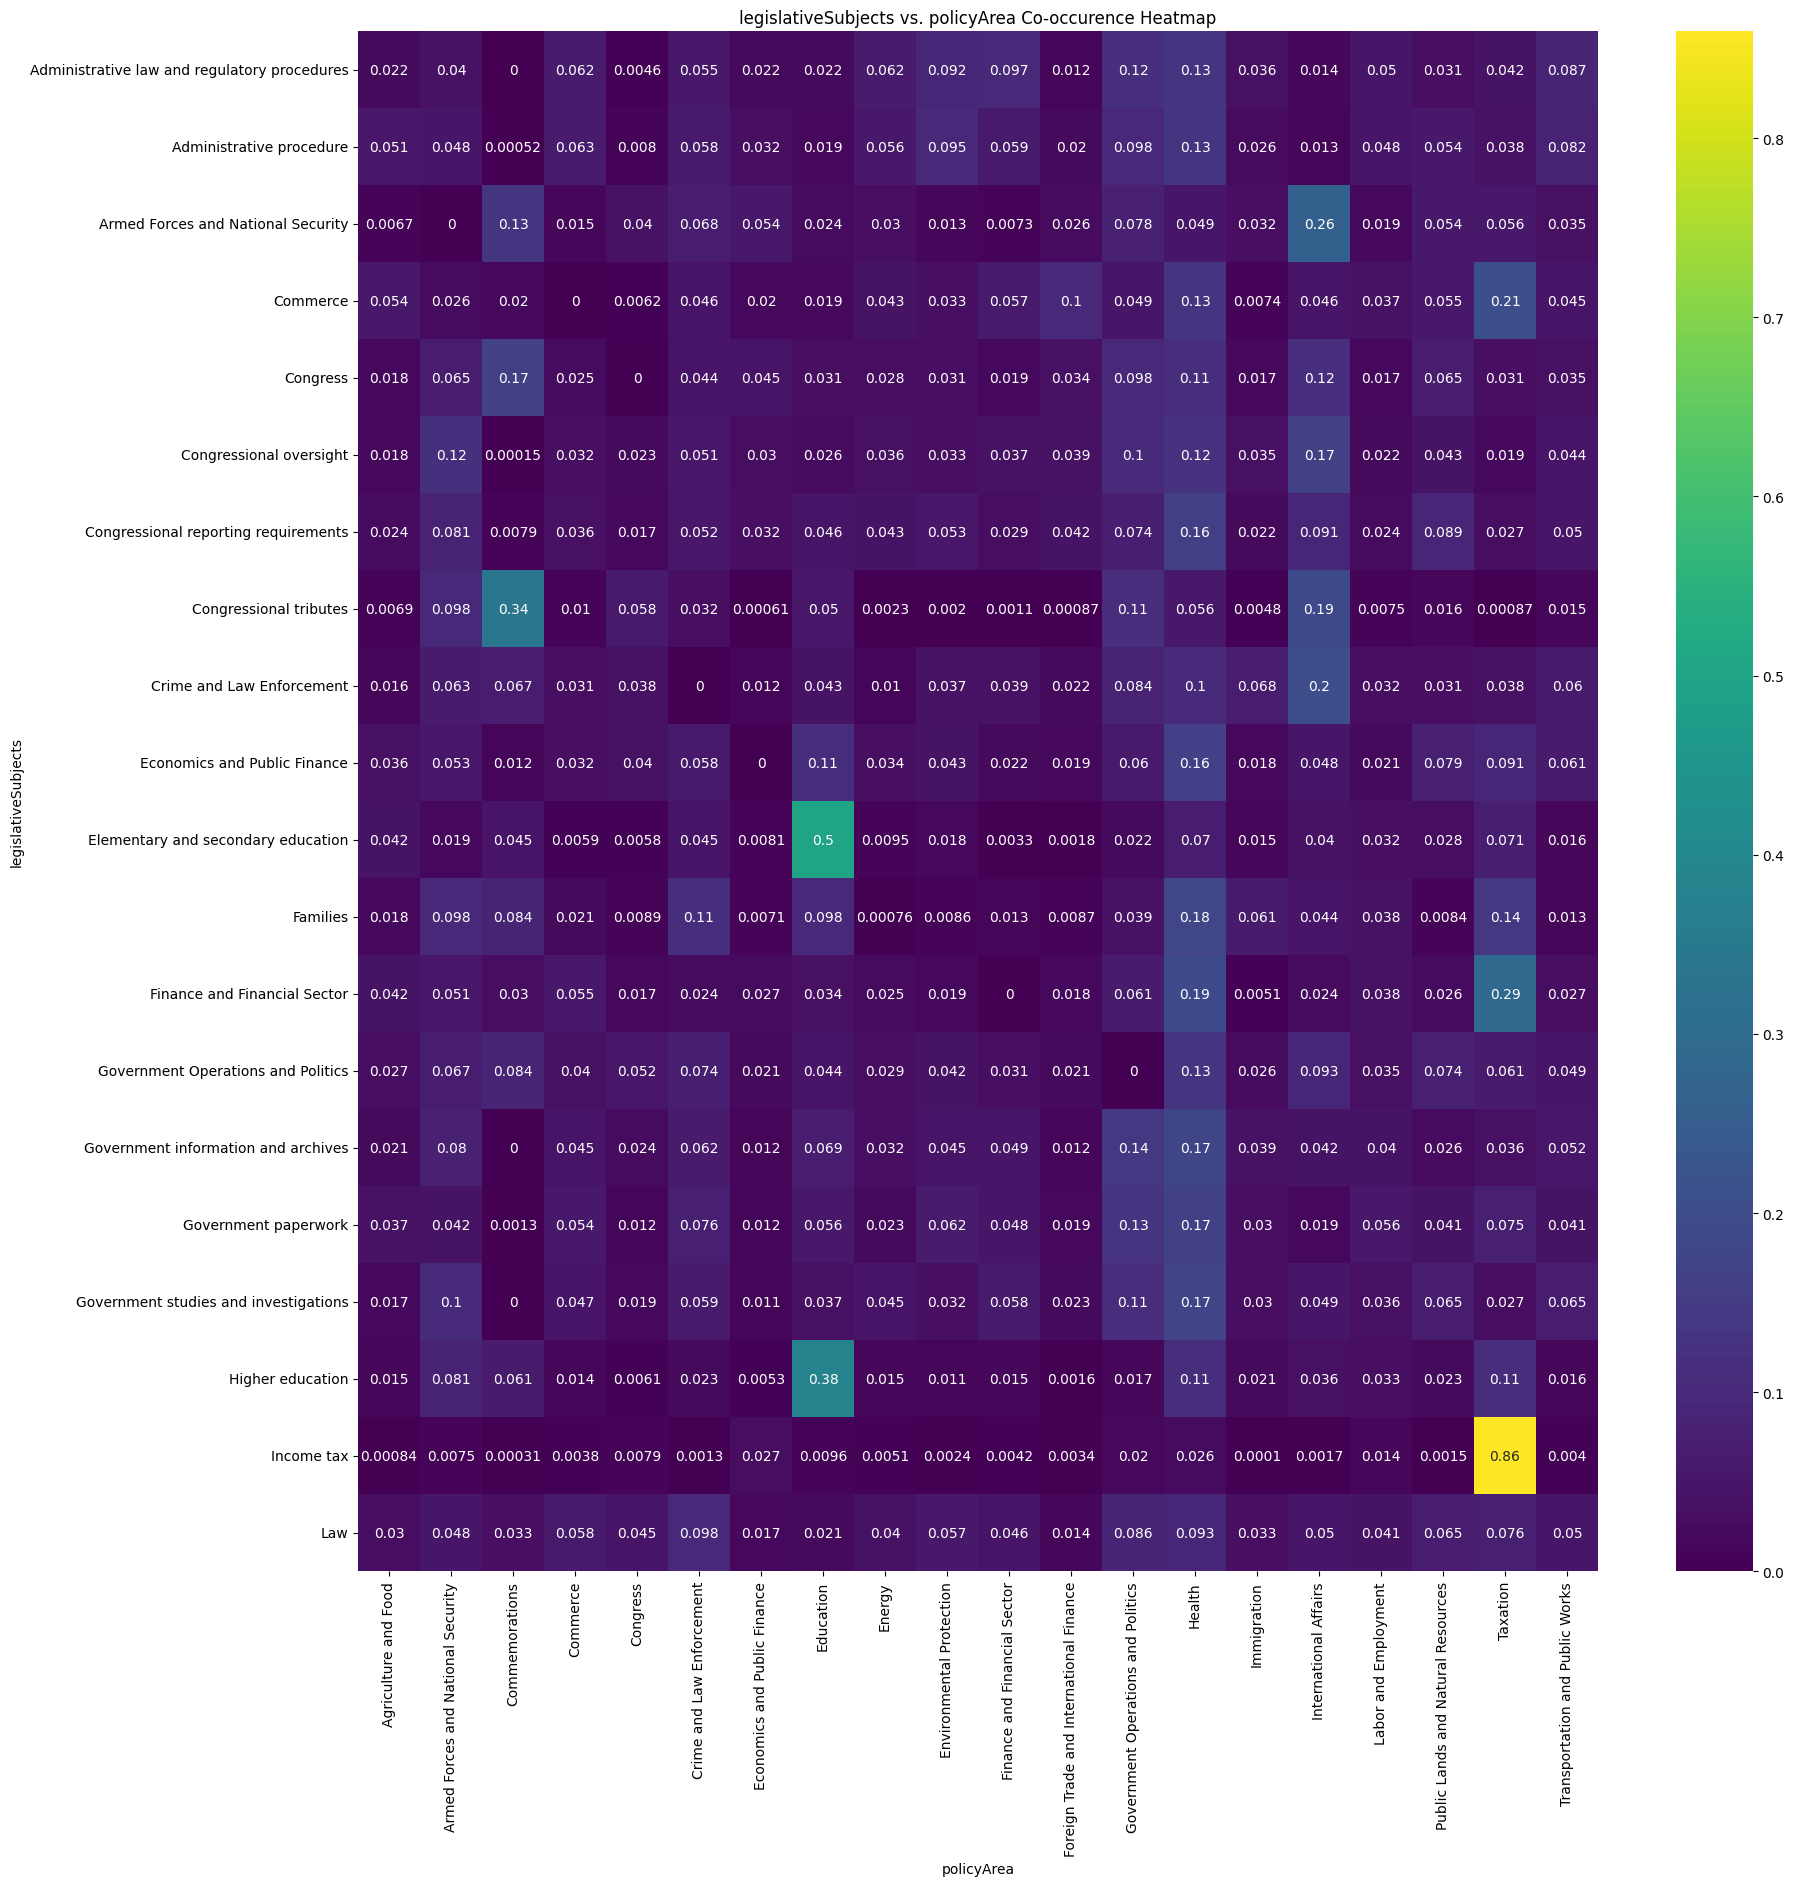

In [13]:
analyze_bias_crosstab(data, ["legislativeSubjects", "policyArea"], n=20, figsize=(20,20))

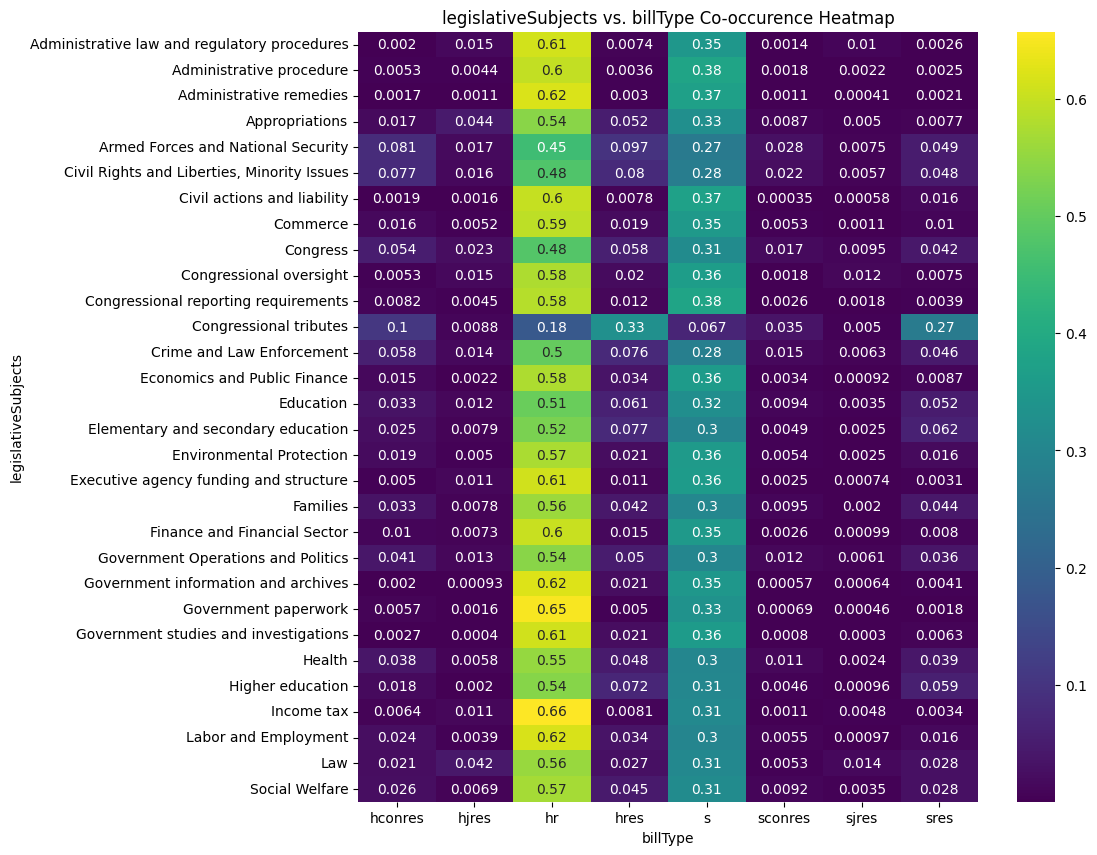

In [14]:
analyze_bias_crosstab(data, ["legislativeSubjects", "billType"], n=30)

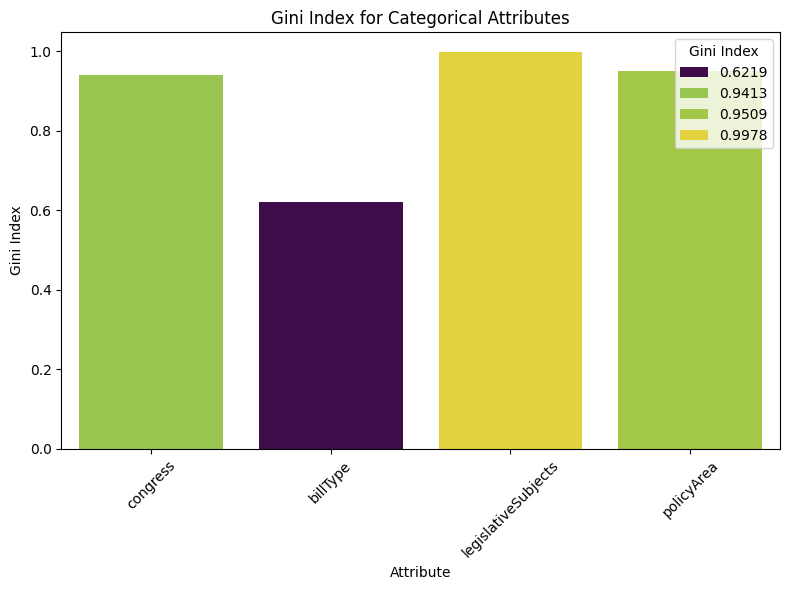

In [15]:
plot_gini_indexes(data, ["congress", "billType", "legislativeSubjects", "policyArea"])

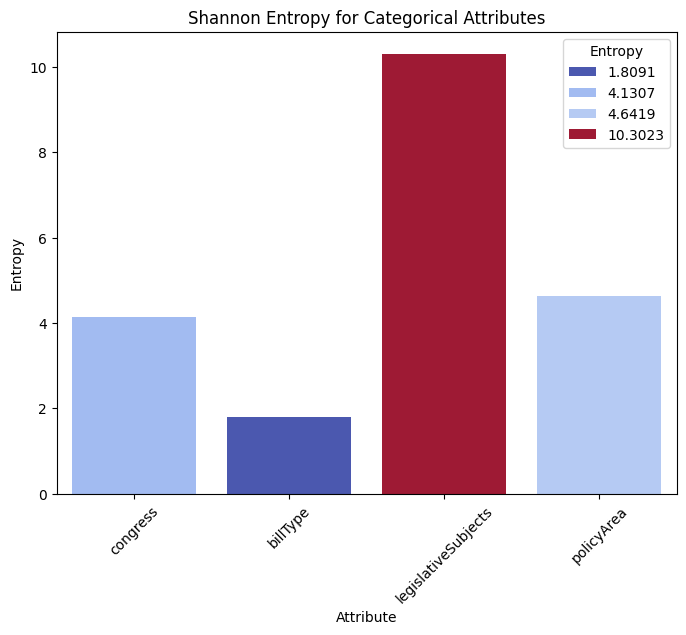

In [16]:
plot_entropies(data, ["congress", "billType", "legislativeSubjects", "policyArea"])

In [17]:
chi_squared_test(data, ["billType", "congress"])

{'Chi2 Statistic': np.float64(8198.1287),
 'P-value': np.float64(0.0),
 'Degrees of Freedom': 119}

In [18]:
chi_squared_test(data, ["billType", "legislativeSubjects"])

{'Chi2 Statistic': np.float64(1027632.8099),
 'P-value': np.float64(0.0),
 'Degrees of Freedom': 43463}

In [19]:
chi_squared_test(data, ["billType", "policyArea"])

{'Chi2 Statistic': np.float64(95380.1756),
 'P-value': np.float64(0.0),
 'Degrees of Freedom': 231}

In [20]:
chi_squared_test(data, ["billType", "legislativeSubjects"])

{'Chi2 Statistic': np.float64(1027632.8099),
 'P-value': np.float64(0.0),
 'Degrees of Freedom': 43463}

In [21]:
calculate_cramers_v(data, ["billType", "congress"])

billType and congress: 
Cramer's V: 0.073 
Association: Very weak/ no association


In [22]:
calculate_cramers_v(data, ["billType", "legislativeSubjects"])

billType and legislativeSubjects: 
Cramer's V: 0.2824 
Association: Weak association


In [23]:
calculate_cramers_v(data, ["billType", "policyArea"])

billType and policyArea: 
Cramer's V: 0.2489 
Association: Weak association


In [24]:
calculate_cramers_v(data, ["policyArea", "legislativeSubjects"])

policyArea and legislativeSubjects: 
Cramer's V: 0.4324 
Association: Moderate association


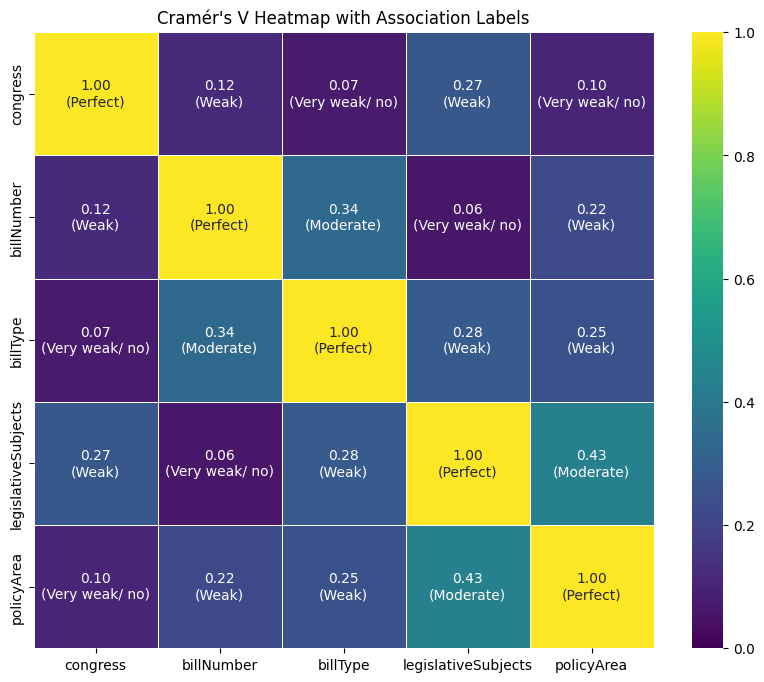

In [25]:
plot_cramers_v_heatmap(data, ["congress", "billNumber", "billType", "legislativeSubjects", "policyArea"])